# Impact of path on spectral estimates in an offline DA product: the Last Millennium Reanalysis 

In [1]:
%load_ext autoreload
%autoreload 2
# import the pens package (https://github.com/fzhu2e/pens)
import pens

## Load LMR 2.1 data from a local .nc file

In [2]:
# Load LMR global-mean data
dname = '/Users/julieneg/Documents/Science/Research/LastMillenniumReanalysis/data/LMRv2.1/'
ens = pens.EnsembleTS().load_nc(dname + 'gmt_MCruns_ensemble_full_LMRv2.1.nc' , var='gmt')

In [3]:
print(ens.value.shape)
print(ens.nt)
print(ens.nEns)

(2001, 2000)
2001
2000


## Plot the quantiles of the ensembles

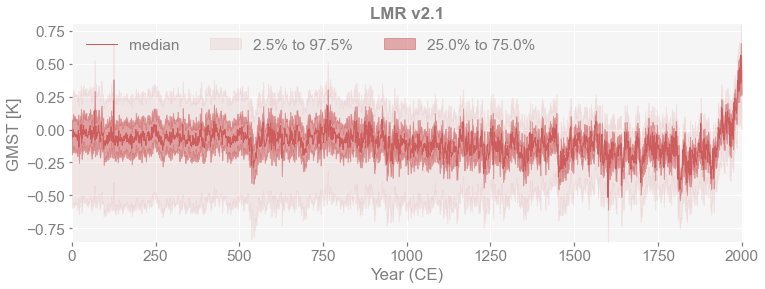

In [4]:
fig, ax = ens.plot_qs(ylabel='GMST [K]', title='LMR v2.1')

## Plot the ensembles in the form of timeseries 2d histogram

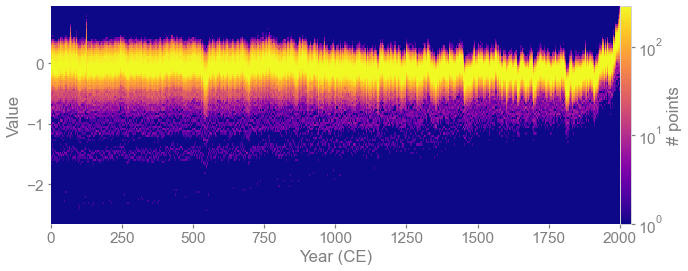

In [5]:
fig, ax = ens.plot_hist2d(color_scale='log', bins=[500, 100])


## Get and plot random sample paths from the ensembles

(2001, 1)
(2001, 3)


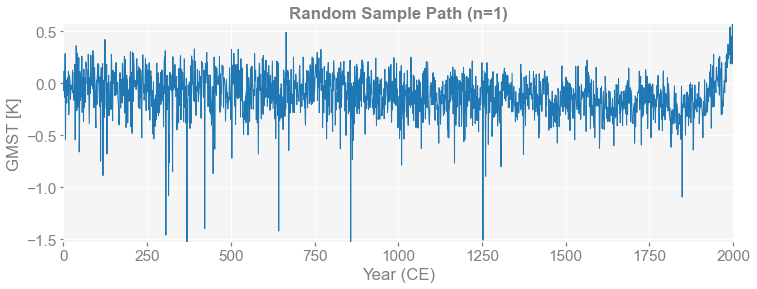

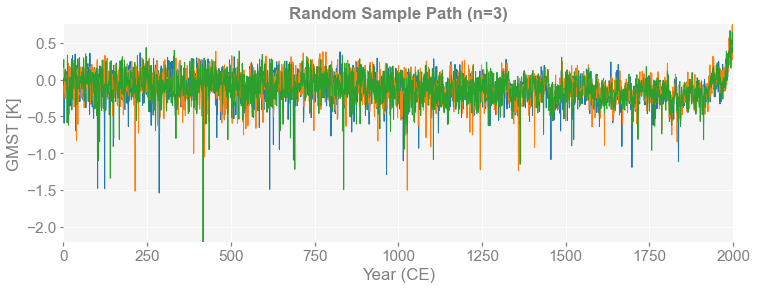

In [6]:
for n in [1, 3]:
    ps = ens.sample_random(n=n, seed=2333)
    fig, ax = ps.plot(ylabel='GMST [K]', title=f'Random Sample Path (n={n})')
    print(ps.value.shape)

Obviouskly, sampling from this ensemble will change the assessment of the timing of certain events (e.g. extreme cooling) in a given series, though the distribution is invariant.  How does this affect the estimation of spectral features?


## Impact on spectral features: peaks and continuum

Convert the series to a pyleoclim [EnsembleSeries object](https://pyleoclim-util.readthedocs.io/en/master/core/ui.html#ensembleseries-pyleoclim-ensembleseries) to easily estimate spectra

In [28]:
import pyleoclim as pyleo
import seaborn as sns

ps = ens.sample_random(n=1000, seed=2333)
series_list = []
for i in range(ps.nEns):
    ts = pyleo.Series(time=ps.time,value=ps.value[:,i])
    series_list.append(ts)
    
es = pyleo.EnsembleSeries(series_list)    

In [29]:
es_spec = es.spectral(method='mtm')

Performing spectral analysis on individual series: 100%|████████████████████████████████| 1000/1000 [01:01<00:00, 16.23it/s]


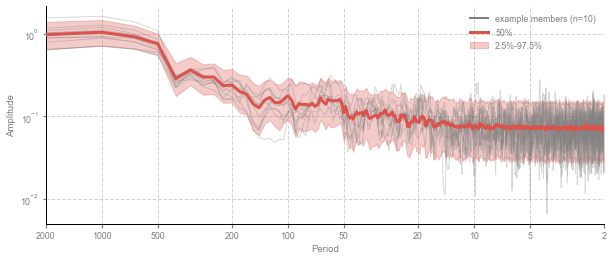

In [42]:
fig, ax = es_spec.plot_envelope()

(<Figure size 720x288 with 1 Axes>,
 <AxesSubplot:xlabel='Period', ylabel='PSD'>)

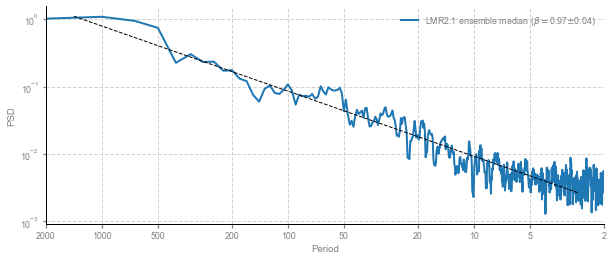

In [48]:
# extract and analyze the ensemble median
esm = pyleo.Series(time=ps.time,value=ps.median,value_name='GMST',label='LMR2.1 ensemble median')
esm_spec = esm.spectral(method ='mtm')
esm_spec.plot(ax=ax)  # not appearing
esm_beta = esm_spec.beta_est()
esm_beta.plot()

### Estimate and plot scaling exponents

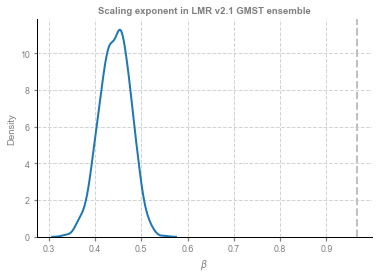

In [49]:
es_beta = es_spec.beta_est()
ax = sns.kdeplot(es_beta.beta_est_res['beta'])
ax.set_xlabel(r'$\beta$')
ax.set_title('Scaling exponent in LMR v2.1 GMST ensemble',fontweight='bold')
ax.axvline(x=esm_beta.beta_est_res['beta'],ymin=0,ymax=10,ls='--',color='silver')

Evidently, sampling from the ensemble has a great impact on the estimated spectral slope. It is expected that online DA would greatly mitigate this effect.